In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='roberta-large'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search roberta-large, learning rate 1e-05, focal loss gamma 2


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.7766	Val Loss:	1.8926	Accuracy:	0.3521	F1:	0.2861
2 / 30: Train Loss:	4.3549	Val Loss:	1.1955	Accuracy:	0.6124	F1:	0.5786
3 / 30: Train Loss:	1.9726	Val Loss:	0.9521	Accuracy:	0.6953	F1:	0.6745
4 / 30: Train Loss:	1.0983	Val Loss:	0.8465	Accuracy:	0.7308	F1:	0.7296
5 / 30: Train Loss:	0.6568	Val Loss:	0.7940	Accuracy:	0.7633	F1:	0.7490
6 / 30: Train Loss:	0.3562	Val Loss:	0.7678	Accuracy:	0.7692	F1:	0.7451
7 / 30: Train Loss:	0.2227	Val Loss:	0.8047	Accuracy:	0.7456	F1:	0.7318
8 / 30: Train Loss:	0.1580	Val Loss:	0.8038	Accuracy:	0.7604	F1:	0.7384
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.82      0.73      0.77        67
               anecdote       0.95      0.88      0.92        43
         cherry picking       0.76      0.80      0.78        56
      conspiracy theory       0.80      0.90      0.84        39
          

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.1470	Val Loss:	1.8950	Accuracy:	0.3698	F1:	0.2795
2 / 30: Train Loss:	2.9964	Val Loss:	1.2039	Accuracy:	0.6361	F1:	0.6105
3 / 30: Train Loss:	1.1687	Val Loss:	0.9442	Accuracy:	0.7041	F1:	0.6989
4 / 30: Train Loss:	0.5808	Val Loss:	0.9022	Accuracy:	0.7456	F1:	0.7337
5 / 30: Train Loss:	0.2538	Val Loss:	0.8508	Accuracy:	0.7396	F1:	0.7118
6 / 30: Train Loss:	0.1821	Val Loss:	0.8102	Accuracy:	0.7544	F1:	0.7417
7 / 30: Train Loss:	0.1899	Val Loss:	0.8277	Accuracy:	0.7544	F1:	0.7367
8 / 30: Train Loss:	0.1590	Val Loss:	0.8175	Accuracy:	0.7367	F1:	0.7235
9 / 30: Train Loss:	0.0853	Val Loss:	0.7668	Accuracy:	0.7485	F1:	0.7333
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.75      0.72      0.73        67
               anecdote       0.90      0.84      0.87        43
         cherry picking       0.61      0.84      0.71        56
   

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.8853	Val Loss:	1.9431	Accuracy:	0.3609	F1:	0.2954
2 / 30: Train Loss:	1.7429	Val Loss:	1.3027	Accuracy:	0.6006	F1:	0.5727
3 / 30: Train Loss:	0.6378	Val Loss:	1.0756	Accuracy:	0.7071	F1:	0.6774
4 / 30: Train Loss:	0.2945	Val Loss:	1.0105	Accuracy:	0.7249	F1:	0.7047
5 / 30: Train Loss:	0.1319	Val Loss:	0.9680	Accuracy:	0.7278	F1:	0.7157
6 / 30: Train Loss:	0.0763	Val Loss:	0.9027	Accuracy:	0.7485	F1:	0.7267
7 / 30: Train Loss:	0.0384	Val Loss:	0.8950	Accuracy:	0.7456	F1:	0.7227
8 / 30: Train Loss:	0.0240	Val Loss:	0.8665	Accuracy:	0.7515	F1:	0.7420
9 / 30: Train Loss:	0.0222	Val Loss:	0.8642	Accuracy:	0.7515	F1:	0.7329
10 / 30: Train Loss:	0.0184	Val Loss:	0.8733	Accuracy:	0.7456	F1:	0.7334
11 / 30: Train Loss:	0.0116	Val Loss:	0.8483	Accuracy:	0.7485	F1:	0.7297
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.73      0.66      0.

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a RobertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	1.6026	Val Loss:	2.0768	Accuracy:	0.3018	F1:	0.2412
2 / 30: Train Loss:	0.6787	Val Loss:	1.5151	Accuracy:	0.5592	F1:	0.5309
3 / 30: Train Loss:	0.2244	Val Loss:	1.2547	Accuracy:	0.6775	F1:	0.6524
4 / 30: Train Loss:	0.1059	Val Loss:	1.1685	Accuracy:	0.7249	F1:	0.7055
5 / 30: Train Loss:	0.0503	Val Loss:	1.1056	Accuracy:	0.7278	F1:	0.7216
6 / 30: Train Loss:	0.0265	Val Loss:	1.0557	Accuracy:	0.7308	F1:	0.7192
7 / 30: Train Loss:	0.0241	Val Loss:	1.0323	Accuracy:	0.7278	F1:	0.6988
8 / 30: Train Loss:	0.0093	Val Loss:	0.9962	Accuracy:	0.7515	F1:	0.7259
9 / 30: Train Loss:	0.0195	Val Loss:	1.0262	Accuracy:	0.7426	F1:	0.7268
10 / 30: Train Loss:	0.0089	Val Loss:	0.9936	Accuracy:	0.7278	F1:	0.6983
11 / 30: Train Loss:	0.0045	Val Loss:	0.9603	Accuracy:	0.7426	F1:	0.7276
12 / 30: Train Loss:	0.0038	Val Loss:	0.9387	Accuracy:	0.7544	F1:	0.7391
13 / 30: Train Loss:	0.0024	Val Loss:	0.9454	Accuracy:	0.7544	F1:	0.7323
14 / 30: Train Loss:	0.0025	Val Loss:	0.9448	Accuracy:	0.754

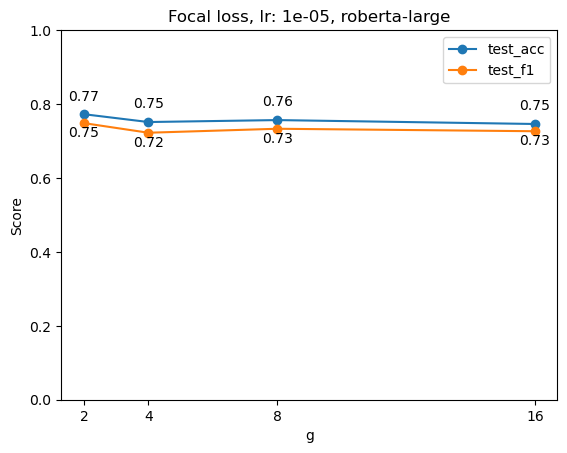

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f